In [1]:
import pandas as pd
import oracledb

credencial_banco = {
    'dsn': 'oracle.fiap.com.br:1521/orcl',
    'usuario': 'rm553472',
    'senha': '100593'
}

def conectar(usuario, senha, dsn):
    try:
        conexao = oracledb.connect(user=usuario, password=senha, dsn=dsn, mode=oracledb.DEFAULT_AUTH)
        print("Conexão com o banco de dados Oracle estabelecida com sucesso.")
        return conexao
    except oracledb.DatabaseError as e:
        print(f"Erro ao conectar ao banco de dados: {e}")
        return None

conexao_consulta = conectar(usuario='rm553472',senha='100593', dsn='oracle.fiap.com.br:1521/orcl')

query_consulta = """
select * from consulta
"""

# Carregar dados em um DataFrame do Pandas
df_consulta = pd.read_sql(query_consulta, conexao_consulta)

# Fechar a conexão com o banco de dados
conexao_consulta.close()

Conexão com o banco de dados Oracle estabelecida com sucesso.


/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_19368/496545195.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_consulta = pd.read_sql(query_consulta, conexao_consulta)


In [2]:
df_consulta

,ID_CONSULTA,FK_ID_CLIENTE,FK_ID_CLINICA,FK_ID_ESPECIALISTA,FK_ID_ESPECIALIDADE,FK_ID_TIPO_SERVICO,DATA_CONSULTA,FK_ID_TRATAMENTO,CUSTO,FK_ID_RETORNO,DATA_RETORNO,FK_ID_STATUS_FEEDBACK,FK_ID_FEEDBACK
0,1,1,1,1,1,presencial,2024-10-21 10:00:00,Limpeza,100.0,1,2024-11-21,1,1.0
1,2,2,2,2,2,remoto,2024-10-22 14:30:00,Avaliação,80.0,1,2024-11-22,1,2.0
2,3,3,3,3,3,presencial,2024-10-23 09:00:00,Consulta Geral,150.0,2,2024-11-23,2,NaN
3,4,4,4,4,4,remoto,2024-10-24 11:30:00,Tratamento,200.0,2,2024-11-24,2,NaN
4,5,5,5,5,5,presencial,2024-10-25 16:00:00,Exame,120.0,1,2024-11-25,1,5.0
5,6,6,6,6,6,remoto,2024-10-26 13:15:00,Acompanhamento,90.0,1,2024-11-26,1,6.0
6,7,7,7,7,7,presencial,2024-10-27 15:45:00,Limpeza,100.0,2,2024-11-27,2,NaN
7,8,8,8,8,8,remoto,2024-10-28 08:30:00,Avaliação,80.0,2,2024-11-28,2,NaN
8,9,9,9,9,9,presencial,2024-10-29 10:30:00,Consulta Geral,150.0,1,2024-11-29,1,9.0
9,10,10,10,10,10,remoto,2024-10-30 14:00:00,Tratamento,200.0,1,2024-11-30,1,10.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remover linhas com feedback nulo para algumas análises
df_feedback = df_consulta.dropna(subset=['FK_ID_FEEDBACK'])


In [4]:
df_feedback

,ID_CONSULTA,FK_ID_CLIENTE,FK_ID_CLINICA,FK_ID_ESPECIALISTA,FK_ID_ESPECIALIDADE,FK_ID_TIPO_SERVICO,DATA_CONSULTA,FK_ID_TRATAMENTO,CUSTO,FK_ID_RETORNO,DATA_RETORNO,FK_ID_STATUS_FEEDBACK,FK_ID_FEEDBACK
0,1,1,1,1,1,presencial,2024-10-21 10:00:00,Limpeza,100.0,1,2024-11-21,1,1.0
1,2,2,2,2,2,remoto,2024-10-22 14:30:00,Avaliação,80.0,1,2024-11-22,1,2.0
4,5,5,5,5,5,presencial,2024-10-25 16:00:00,Exame,120.0,1,2024-11-25,1,5.0
5,6,6,6,6,6,remoto,2024-10-26 13:15:00,Acompanhamento,90.0,1,2024-11-26,1,6.0
8,9,9,9,9,9,presencial,2024-10-29 10:30:00,Consulta Geral,150.0,1,2024-11-29,1,9.0
9,10,10,10,10,10,remoto,2024-10-30 14:00:00,Tratamento,200.0,1,2024-11-30,1,10.0


# Gráficos e Análises

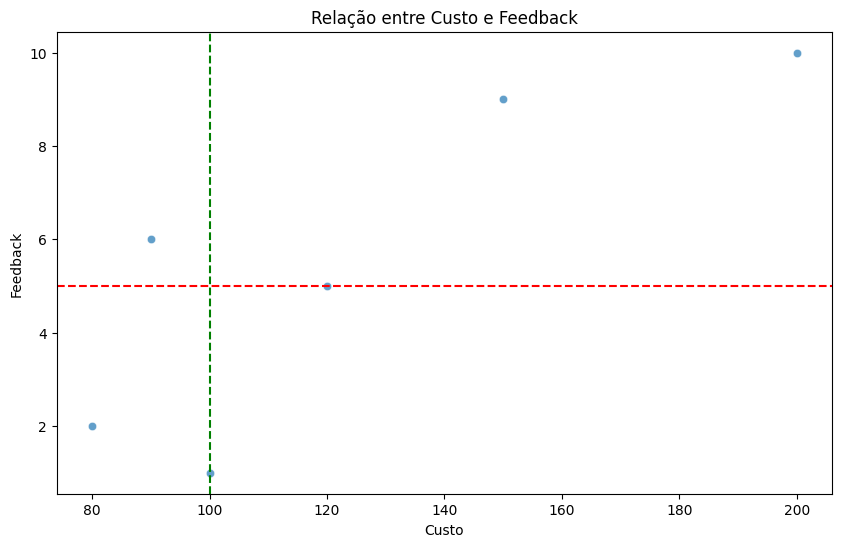

In [5]:
# Relação entre Custo e Feedback

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_feedback, x='CUSTO', y='FK_ID_FEEDBACK', alpha=0.7)
plt.title('Relação entre Custo e Feedback')
plt.xlabel('Custo')
plt.ylabel('Feedback')
plt.axhline(y=5, color='r', linestyle='--')
plt.axvline(x=100, color='g', linestyle='--')
plt.show()


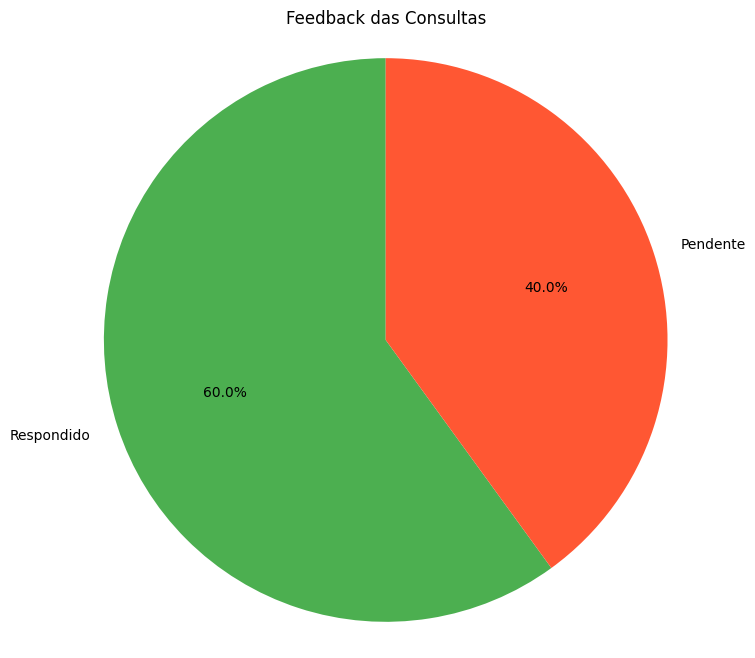

In [6]:
# Quantidade de Consultas com Feedback Respondido vs Pendente
# Contar feedbacks
feedback_counts = df_consulta['FK_ID_FEEDBACK'].isna().value_counts()
labels = ['Respondido', 'Pendente']

plt.figure(figsize=(8, 8))
plt.pie(feedback_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5733'])
plt.title('Feedback das Consultas')
plt.axis('equal')  # Para fazer o gráfico ser um círculo
plt.show()



/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_19368/1162509530.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_consulta, x='Tipo_Feedback', y='CUSTO', estimator=sum, palette='muted')


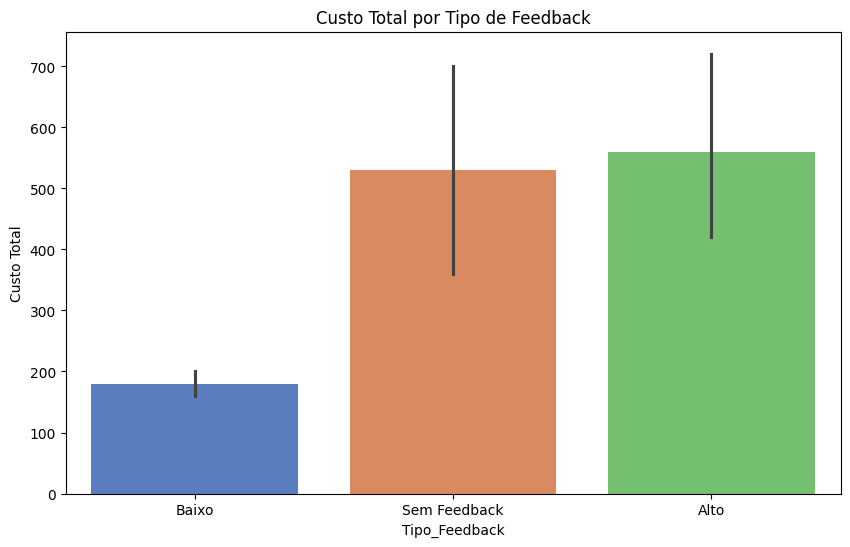

In [7]:
# Gráfico de Custo por Tipo de Feedback

# Se houver um campo que categorize os feedbacks
df_consulta['Tipo_Feedback'] = df_consulta['FK_ID_FEEDBACK'].apply(lambda x: 'Alto' if x >= 5 else 'Baixo' if pd.notna(x) else 'Sem Feedback')

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_consulta, x='Tipo_Feedback', y='CUSTO', estimator=sum, palette='muted')
plt.title('Custo Total por Tipo de Feedback')
plt.ylabel('Custo Total')
plt.show()


In [8]:
# Converter a coluna de DATA_CONSULTA para datetime
df_consulta['DATA_CONSULTA'] = pd.to_datetime(df_consulta['DATA_CONSULTA'])

# Extrair mês e ano
df_consulta['ANO_MES'] = df_consulta['DATA_CONSULTA'].dt.to_period('M')

/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_19368/1724516673.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=consultas_por_mes, x='ANO_MES', y='Quantidade de Consultas', palette='viridis')


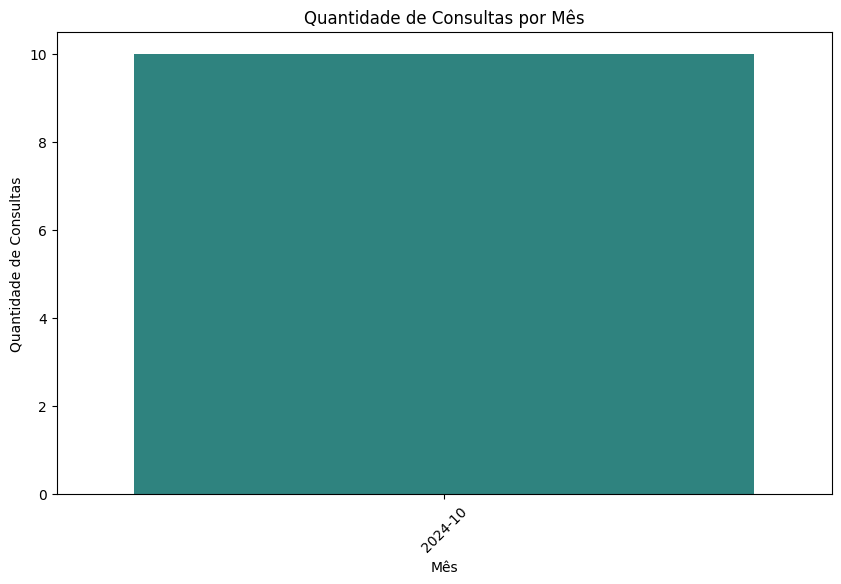

In [9]:
#  Quantidade de Consultas por Mês

# Contar consultas por mês
consultas_por_mes = df_consulta.groupby('ANO_MES').size().reset_index(name='Quantidade de Consultas')

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=consultas_por_mes, x='ANO_MES', y='Quantidade de Consultas', palette='viridis')
plt.title('Quantidade de Consultas por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Consultas')
plt.xticks(rotation=45)
plt.show()


/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_19368/3062210164.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=valor_medio_por_mes, x='ANO_MES', y='Valor Médio', palette='viridis')


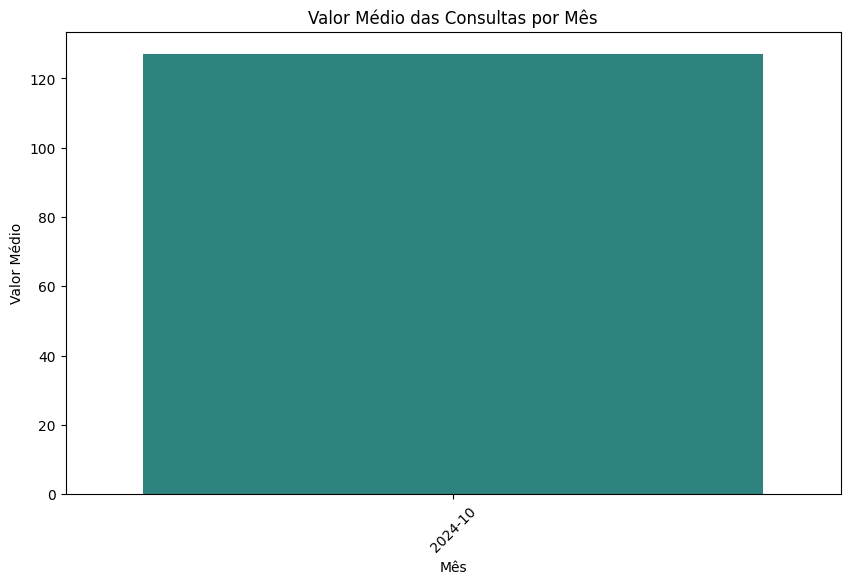

In [10]:
# Valor Médio das Consultas por Mês

# Calcular o valor médio das consultas por mês
valor_medio_por_mes = df_consulta.groupby('ANO_MES')['CUSTO'].mean().reset_index(name='Valor Médio')

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=valor_medio_por_mes, x='ANO_MES', y='Valor Médio', palette='viridis')
plt.title('Valor Médio das Consultas por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Médio')
plt.xticks(rotation=45)
plt.show()



/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_19368/1822012925.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feedback_por_mes, x='ANO_MES', y='Quantidade_Feedbacks', palette='viridis')


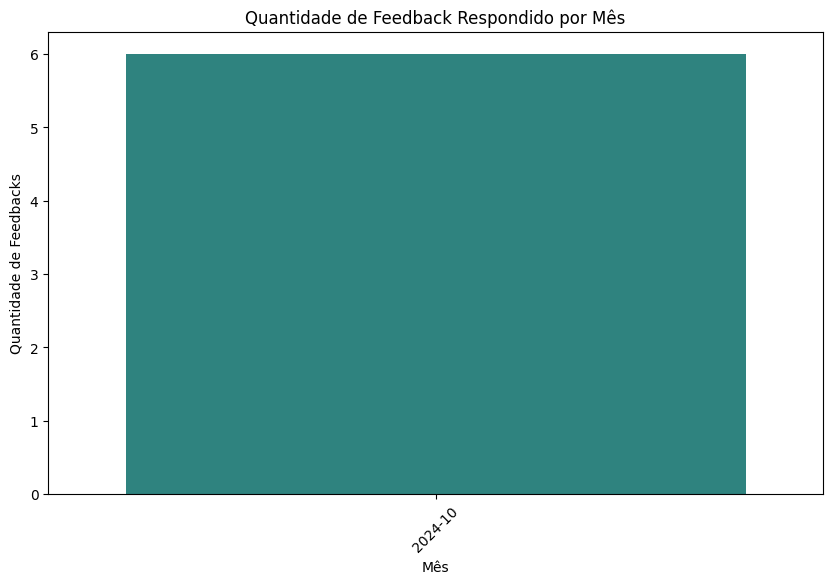

In [11]:
# Quantidade de Feedback Respondido e Nota Média por Mês

# Filtrar apenas as consultas com feedback
feedback_df = df_consulta.dropna(subset=['FK_ID_FEEDBACK'])

# Calcular a quantidade de feedbacks respondidos e a nota média
feedback_por_mes = feedback_df.groupby('ANO_MES').agg(
    Quantidade_Feedbacks=('FK_ID_FEEDBACK', 'size'),
    Nota_Media=('FK_ID_FEEDBACK', 'mean')
).reset_index()

# Criar um gráfico de barras para a quantidade de feedbacks respondidos
plt.figure(figsize=(10, 6))
sns.barplot(data=feedback_por_mes, x='ANO_MES', y='Quantidade_Feedbacks', palette='viridis')
plt.title('Quantidade de Feedback Respondido por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Feedbacks')
plt.xticks(rotation=45)
plt.show()



